In [11]:
import numpy as np
from PIL import Image, ImageStat
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.stats as stats
import seaborn as sns
import warnings
from typing import Dict

warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (15,6)
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15, 6)})

In [5]:
# get paths
paths = {
    'training': os.path.join(os.environ['CIL_DATA'], 'training'),
    'test':     os.path.join(os.environ['CIL_DATA'], 'test'),
    'gmaps':    os.path.join(os.environ['CIL_DATA'], 'gmaps')
}

## Properties IMAGES -- averaged per image

In [ ]:
# -- IMAGES --
hue_dict = {}
saturation_dict = {}
brightness_dict = {}

# iterate over image sets
for category in paths.keys():
    directory = os.path.join(paths[category], 'images')
    
    if category == 'gmaps':
        hue_list = {'all': [],
                           'filtered': []}
        saturation_list = {'all': [],
                           'filtered': []}
        brightness_list = {'all': [],
                           'filtered': []}
    else:
        hue_list = []
        saturation_list = []
        brightness_list = []
    
    for filename in tqdm(os.listdir(directory)):
        f = os.path.join(directory, filename)
        # get files
        if os.path.isfile(f):
            with Image.open(f) as im:
                im_hsv = im.convert('HSV') 
                # get image brighness
                hue = ImageStat.Stat(im_hsv).mean[0]
                saturation = ImageStat.Stat(im_hsv).mean[1]
                brightness = ImageStat.Stat(im_hsv).mean[2]
                
                # append stats
                if category == 'gmaps':
                    city = '_'.join(filename.split('_')[:-1])
                    if city not in brightness_list:
                        hue_list[city] = []
                        saturation_list[city] = []
                        brightness_list[city] = []
                    
                    hue_list[city].append(hue)
                    saturation_list[city].append(saturation)
                    brightness_list[city].append(brightness)
                    
                    hue_list['all'].append(hue)
                    saturation_list['all'].append(saturation)
                    brightness_list['all'].append(brightness)
                    
                    if brightness >= 80 and brightness < 180:
                        brightness_list['filtered'].append(brightness)
                else:
                    hue_list.append(hue)
                    saturation_list.append(saturation)
                    brightness_list.append(brightness)
                
    hue_dict[category] = hue_list
    saturation_dict[category] = saturation_list
    brightness_dict[category] = brightness_list

In [ ]:
def plot_dict(stat_dict, title):
    sns.set_style('whitegrid')
    sns.set(rc={'figure.figsize':(15, 6)})

    cities = list(stat_dict['gmaps'].keys())
    cities = cities[:1] + cities[1+1:]

    labels_gmaps = ['gmaps: ' + city for city in cities]

    sns.kdeplot(np.array(stat_dict['training']), bw=0.3, linewidth=3)
    sns.kdeplot(np.array(stat_dict['test']), bw=0.3, linewidth=3)
    sns.kdeplot(np.array(stat_dict['gmaps']['all']), bw=0.3, linewidth=3)
    for city in cities:
        sns.kdeplot(np.array(stat_dict['gmaps'][city]), bw=0.3)

    plt.title(title)
    plt.legend(labels=["training","test"] + labels_gmaps)
    # plt.legend(labels=["training","test","gmaps: initial", "gmaps: filtered"] + labels_gmaps)
    
# Plot hue
plot_dict(hue_dict, "Hue distribution")

In [ ]:
# Plot saturation
plot_dict(saturation_dict, "Saturation distribution")

In [ ]:
# Plot brighness
plot_dict(brightness_dict, "Brightness distribution")

## Properties IMAGES -- averaged per pixel

In [ ]:
# -- IMAGES --
hue_dict = {}
saturation_dict = {}
brightness_dict = {}

# iterate over image sets
for category in paths.keys():
    directory = os.path.join(paths[category], 'images')
    
    if category == 'gmaps':
        hue_list = {'all': 0.0,
                    'filtered': 0.0}
        saturation_list = {'all': 0.0,
                           'filtered': 0.0}
        brightness_list = {'all': 0.0,
                           'filtered': 0.0}
        count = {'all': 0,
                 'filtered': 0}
    else:
        hue_list = 0.0
        saturation_list = 0.0
        brightness_list = 0.0
        count = 0
        
    for filename in tqdm(os.listdir(directory)):
        f = os.path.join(directory, filename)
        # get files
        if os.path.isfile(f):
            with Image.open(f) as im:
                im_hsv = im.convert('HSV') 
                # get image brighness
                hue = ImageStat.Stat(im_hsv).sum[0]
                saturation = ImageStat.Stat(im_hsv).sum[1]
                brightness = ImageStat.Stat(im_hsv).sum[2]
                
                # append stats
                if category == 'gmaps':
                    city = '_'.join(filename.split('_')[:-1])
                    if city not in brightness_list:
                        hue_list[city] = 0.0
                        saturation_list[city] = 0.0
                        brightness_list[city] = 0.0
                        count[city] = 0
                    
                    hue_list[city] += hue
                    saturation_list[city] += saturation
                    brightness_list[city] += brightness
                    count[city] += 1
                    
                    hue_list['all'] += hue
                    saturation_list['all'] += saturation
                    brightness_list['all'] += brightness
                    count['all'] += 1
                    
                    if brightness >= 80 and brightness < 180:
                        brightness_list['filtered'] += brightness
                        count['filtered'] += 1
                else:
                    hue_list += hue
                    saturation_list += saturation
                    brightness_list += brightness
                    count += 1
                
    if category == 'gmaps':
        hue_dict[category] = {}
        saturation_dict[category] = {}
        brightness_dict[category] = {}
        for city in brightness_list:
            if count[city] > 0:
                hue_dict[category][city] = hue_list[city] / (count[city] * 400 * 400)
                saturation_dict[category][city] = saturation_list[city] / (count[city] * 400 * 400)
                brightness_dict[category][city] = brightness_list[city] / (count[city] * 400 * 400)
            else:
                hue_dict[category][city] = hue_list[city]
                saturation_dict[category][city] = saturation_list[city]
                brightness_dict[category][city] = brightness_list[city]
    else:
        hue_dict[category] = hue_list / (count * 400 * 400)
        saturation_dict[category] = saturation_list / (count * 400 * 400)
        brightness_dict[category] = brightness_list / (count * 400 * 400)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.set_figwidth(15)
fig.set_figheight(10)

cities = list(brightness_dict['gmaps'].keys())
cities = cities[:1] + cities[1+1:]
labels_gmaps = [city for city in cities]
objects = ["training","test"] + labels_gmaps
y_pos = np.arange(len(objects))

hue = [hue_dict['training'], hue_dict['training']] + [hue_dict['gmaps'][city] for city in cities]
saturation = [saturation_dict['training'], saturation_dict['training']] + [saturation_dict['gmaps'][city] for city in cities]
brightness = [brightness_dict['training'], brightness_dict['training']] + [brightness_dict['gmaps'][city] for city in cities]

ax1.bar(y_pos, hue, align='center', alpha=0.8)
ax1.set_xticks(y_pos, minor=False)
ax1.set_xticklabels(objects, fontdict=None, minor=False)
ax1.set_ylabel('Hue')

ax2.bar(y_pos, saturation, align='center', alpha=0.8)
ax2.set_xticks(y_pos, minor=False)
ax2.set_xticklabels(objects, fontdict=None, minor=False)
ax2.set_ylabel('Saturation')

ax3.bar(y_pos, brightness, align='center', alpha=0.8)
ax3.set_xticks(y_pos, minor=False)
ax3.set_xticklabels(objects, fontdict=None, minor=False)
ax3.set_ylabel('Brightness')

plt.show()

## Properties Masks

In [ ]:
# -- IMAGES --
n_pos_pix_dict = {}

paths = {
    'training': '../data/training',
    'gmaps': '../data/gmaps'
}

# iterate over image sets
for category in paths.keys():
    directory = os.path.join(paths[category], 'groundtruth')
    
    if category == 'gmaps':
        n_pos_pix_list = {'all': [],
                          'filtered': []}
    else:
        n_pos_pix_list = []
    
    for filename in tqdm(os.listdir(directory)):
        f = os.path.join(directory, filename)
        # get files
        if os.path.isfile(f):
            with Image.open(f) as im:
                im_hsv = im.convert('HSV') 
                # get image brighness
                brightness = np.array(im_hsv)[:,:,-1].flatten()
                n_pos_pix = np.count_nonzero(brightness >= 128) / brightness.shape[0] * 100
                
                # append stats
                if category == 'gmaps':
                    city = '_'.join(filename.split('_')[:-1])
                    if city not in n_pos_pix_list:
                        n_pos_pix_list[city] = []
                    
                    n_pos_pix_list[city].append(n_pos_pix)
                    n_pos_pix_list['all'].append(n_pos_pix)
                    
                    if n_pos_pix >= 10:
                        n_pos_pix_list['filtered'].append(n_pos_pix)
                else:
                    n_pos_pix_list.append(n_pos_pix)
                
    n_pos_pix_dict[category] = n_pos_pix_list

In [ ]:
# Plot pos pixels
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15, 6)})

cities = list(n_pos_pix_dict['gmaps'].keys())
cities = cities[:1] + cities[1+1:]

labels_gmaps = ['gmaps: ' + city for city in cities]

x, y = sns.kdeplot(np.array(n_pos_pix_dict['training']), bw=0.1, linewidth=3).get_lines()[0].get_data()
sns.kdeplot(np.array(n_pos_pix_dict['gmaps']['all']), bw=0.1)
sns.kdeplot(np.array(n_pos_pix_dict['gmaps']['filtered']), bw=0.1)
# for city in cities:
#     sns.kdeplot(np.array(n_pos_pix_dict['gmaps'][city]), bw=0.3)

plt.title("Percentage of positive pixels")
# plt.legend(labels=["training"] + labels_gmaps)
plt.legend(labels=["training","test","gmaps: initial", "gmaps: filtered"] + labels_gmaps)

y[100]

# Image Normalization

In [ ]:
from pprint import pprint
stats_dict = {}
for category in hue_dict.keys():

    if isinstance(hue_dict[category], dict):
        stats_dict[category] = dict()
        for city in hue_dict[category].keys():
            hues = np.array(hue_dict[category][city])
            sats = np.array(saturation_dict[category][city])
            vals = np.array(brightness_dict[category][city])

            stats_dict[category][city] = dict(
                mean=(np.mean(hues), np.mean(sats), np.mean(vals)),
                std=(np.std(hues), np.std(sats), np.std(vals))
            )
    else:
        hues = np.array(hue_dict[category])
        sats = np.array(saturation_dict[category])
        vals = np.array(brightness_dict[category])

        stats_dict[category] = dict(
            mean=(np.mean(hues), np.mean(sats), np.mean(vals)),
            std=(np.std(hues), np.std(sats), np.std(vals))
        )

print('Mean and standard-deviations;')
pprint(stats_dict)


In [ ]:
from pprint import pprint

hue_dict_norm = {}
saturation_dict_norm = {}
brightness_dict_norm = {}

for category in hue_dict.keys():

    if isinstance(hue_dict[category], dict):

        hue_dict_norm[category] = {}
        saturation_dict_norm[category] = {}
        brightness_dict_norm[category] = {}
        for city in hue_dict[category].keys():
            hues = np.array(hue_dict[category][city])
            sats = np.array(saturation_dict[category][city])
            vals = np.array(brightness_dict[category][city])

            hue_dict_norm[category][city] = (hues - np.mean(hues)) / np.std(hues)
            saturation_dict_norm[category][city] = (sats - np.mean(sats)) / np.std(sats)
            brightness_dict_norm[category][city] = (vals - np.mean(vals)) / np.std(vals)

    else:
        hues = np.array(hue_dict[category])
        sats = np.array(saturation_dict[category])
        vals = np.array(brightness_dict[category])

        hue_dict_norm[category] = (hues - np.mean(hues)) / np.std(hues)
        saturation_dict_norm[category] = (sats - np.mean(sats)) / np.std(sats)
        brightness_dict_norm[category] = (vals - np.mean(vals)) / np.std(vals)


In [ ]:
plot_dict(hue_dict_norm, "Hue distribution normalized")

In [ ]:
plot_dict(saturation_dict_norm, "Saturation distribution normalized")

In [ ]:
plot_dict(brightness_dict_norm, "Brightness distribution normalized")


# Pixelwise Image Stats

In [2]:
def pixelwise_hist(colorspace='L', masked=False):
    # prepare histogram length for color_space
    if colorspace == 'L':
        hist_len = 256
    elif colorspace == 'HSV':
        hist_len = 768
    elif colorspace == 'RGB':
        hist_len = 768
    elif colorspace == 'YCbCr':
        hist_len = 768
    else:
        raise RuntimeError('Unkown Colorspace')

    # iterate over image sets
    hist_dict = {}
    for category in paths.keys():
        if category == 'gmaps':
            hist_dict[category] = {}
            hist_dict[category]['all'] = np.zeros(hist_len)
        else:
            hist_dict[category] = np.zeros(hist_len)
        
        for filename in tqdm(os.listdir(os.path.join(paths[category], 'images'))):
            f_im = os.path.join(paths[category], 'images', filename)
            f_gt = os.path.join(paths[category], 'groundtruth', filename)
            
            # get files
            im = Image.open(f_im).convert(colorspace)
            gt = Image.open(f_gt).convert('L') if masked and category != 'test' else None
            hist = np.array(im.histogram(mask=gt))
            
            # add histogram
            if category == 'gmaps':
                city = '_'.join(filename.split('_')[:-1])
                if city not in hist_dict[category]:
                    hist_dict[category][city] = np.zeros(hist_len)
                hist_dict[category][city] += hist                        
                hist_dict[category]['all'] += hist
            else:
                hist_dict[category] += hist
    return hist_dict

In [14]:
def plot_hist_dict(hist_dict:Dict[str, Dict[str, np.ndarray]], channel=0, bandwith=0.1, ax=None):
    if ax == None:
        ax = plt.gca()
        sns.set(rc={'figure.figsize':(15, 6)})

    # histogram indices
    x = np.arange(0, 256)
    idx = x + 256*channel

    # plot training and test data
    for category in list(hist_dict.keys())[:-1]: # ignore gmaps
        sns.kdeplot(x, weights=hist_dict[category][idx], bw=bandwith, linewidth=3, label=category, ax=ax)
    
    # plot google maps data
    sns.kdeplot(x, weights=hist_dict['gmaps']['all'][idx], bw=bandwith, linewidth=3, label=f'gmaps: all', ax=ax)
    #sns.kdeplot(x, weights=hist_dict['gmaps']['filtered'][idx], bw=bandwith, linewidth=3, label=f'gmaps: filtered')
    for city in list(hist_dict['gmaps'].keys())[2:]:
        sns.kdeplot(x, weights=hist_dict['gmaps'][city][idx], bw=bandwith, label=f'gmaps: {city}', ax=ax)
   
    ax.legend()
    return ax

### Colorspace Gray (L)

In [6]:
hist_dict_l = pixelwise_hist(colorspace='L')

100%|██████████| 12000/12000 [01:21<00:00, 148.10it/s]


Text(0.5, 1.0, 'Brightness Density of Pixels')

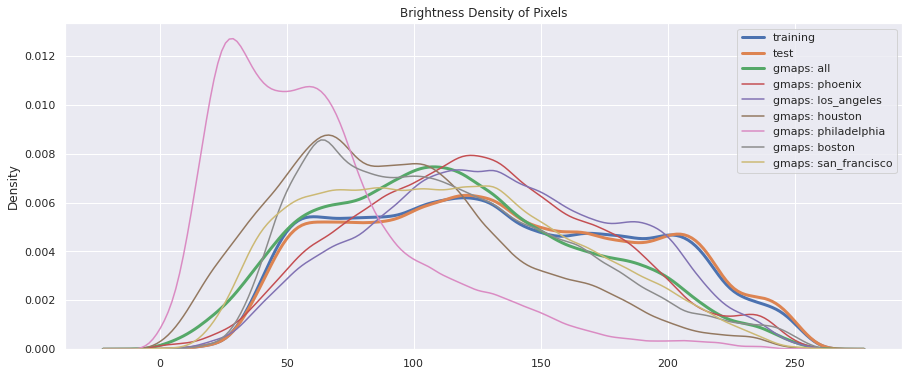

In [12]:
plot_hist_dict(hist_dict_l, channel=0, bandwith=0.1)
plt.title("Brightness Density of Pixels")

In [16]:
hist_dict_l_masked = pixelwise_hist(colorspace='L', masked=True)

100%|██████████| 12000/12000 [01:45<00:00, 113.35it/s]


Text(0.5, 1.0, 'Brightness Density of Road Pixels')

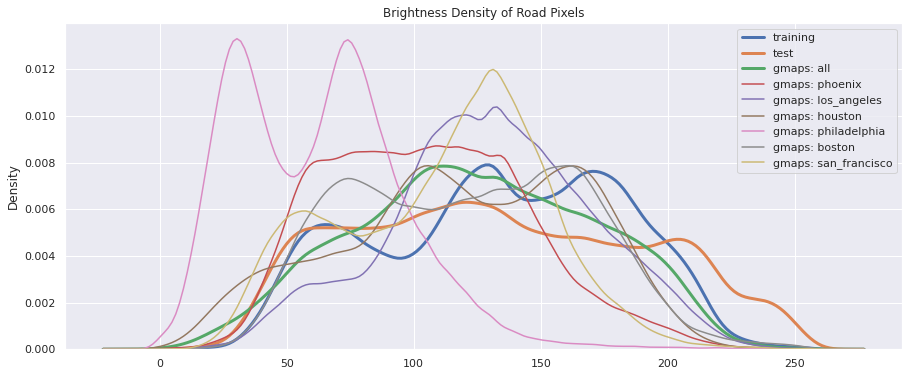

In [17]:
plot_hist_dict(hist_dict_l_masked, channel=0, bandwith=0.1)
plt.title("Brightness Density of Road Pixels")

### Colorspace HSV

In [18]:
hist_dict_hsv = pixelwise_hist(colorspace='HSV')

100%|██████████| 12000/12000 [02:35<00:00, 76.98it/s]


<AxesSubplot:title={'center':'Value Density of Pixels'}, ylabel='Density'>

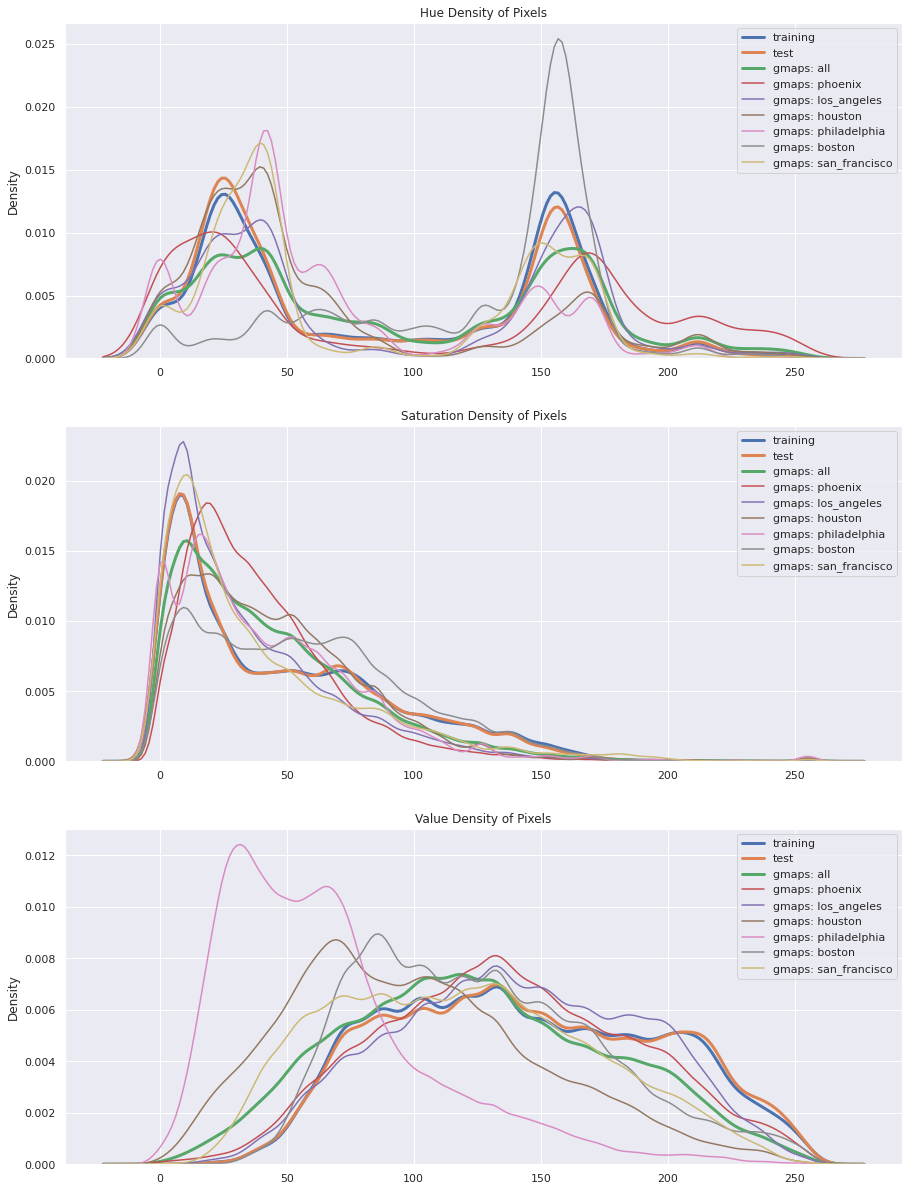

In [19]:
_, ax = plt.subplots(3, 1, figsize=(15, 21))
bw = 0.1

ax[0].set_title("Hue Density of Pixels")
plot_hist_dict(hist_dict_hsv, channel=0, bandwith=bw, ax=ax[0])

ax[1].set_title("Saturation Density of Pixels")
plot_hist_dict(hist_dict_hsv, channel=1, bandwith=bw, ax=ax[1])

ax[2].set_title("Value Density of Pixels")
plot_hist_dict(hist_dict_hsv, channel=2, bandwith=bw, ax=ax[2])

In [20]:
hist_dict_hsv_masked = pixelwise_hist(colorspace='HSV', masked=True)

100%|██████████| 12000/12000 [02:55<00:00, 68.51it/s]


<AxesSubplot:title={'center':'Value Density of Road Pixels'}, ylabel='Density'>

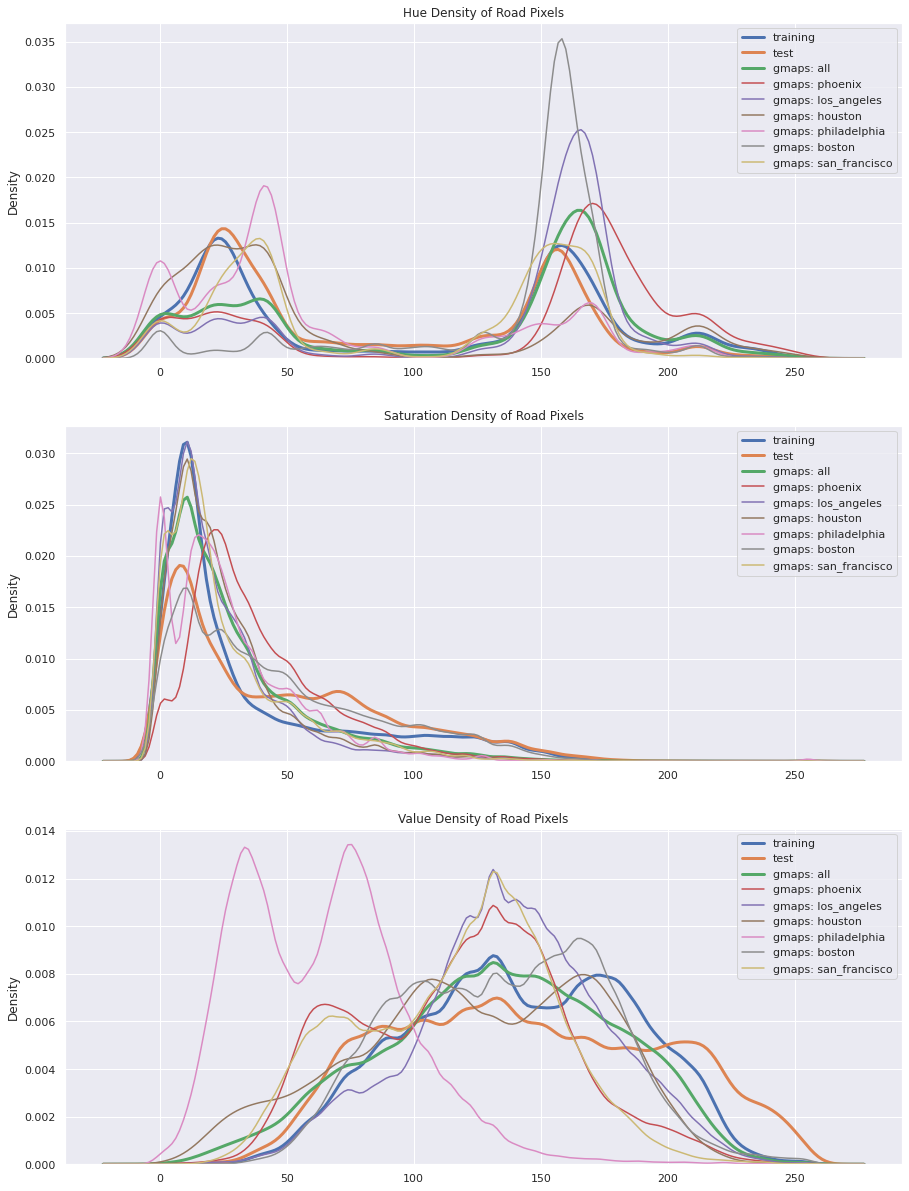

In [21]:
_, ax = plt.subplots(3, 1, figsize=(15, 21))
bw = 0.1

ax[0].set_title("Hue Density of Road Pixels")
plot_hist_dict(hist_dict_hsv_masked, channel=0, bandwith=bw, ax=ax[0])

ax[1].set_title("Saturation Density of Road Pixels")
plot_hist_dict(hist_dict_hsv_masked, channel=1, bandwith=bw, ax=ax[1])

ax[2].set_title("Value Density of Road Pixels")
plot_hist_dict(hist_dict_hsv_masked, channel=2, bandwith=bw, ax=ax[2])

#### Colorspace RGB

In [22]:
hist_dict_rgb = pixelwise_hist(colorspace='RGB')

100%|██████████| 12000/12000 [01:24<00:00, 142.83it/s]


<AxesSubplot:title={'center':'Blue Density of Pixels'}, ylabel='Density'>

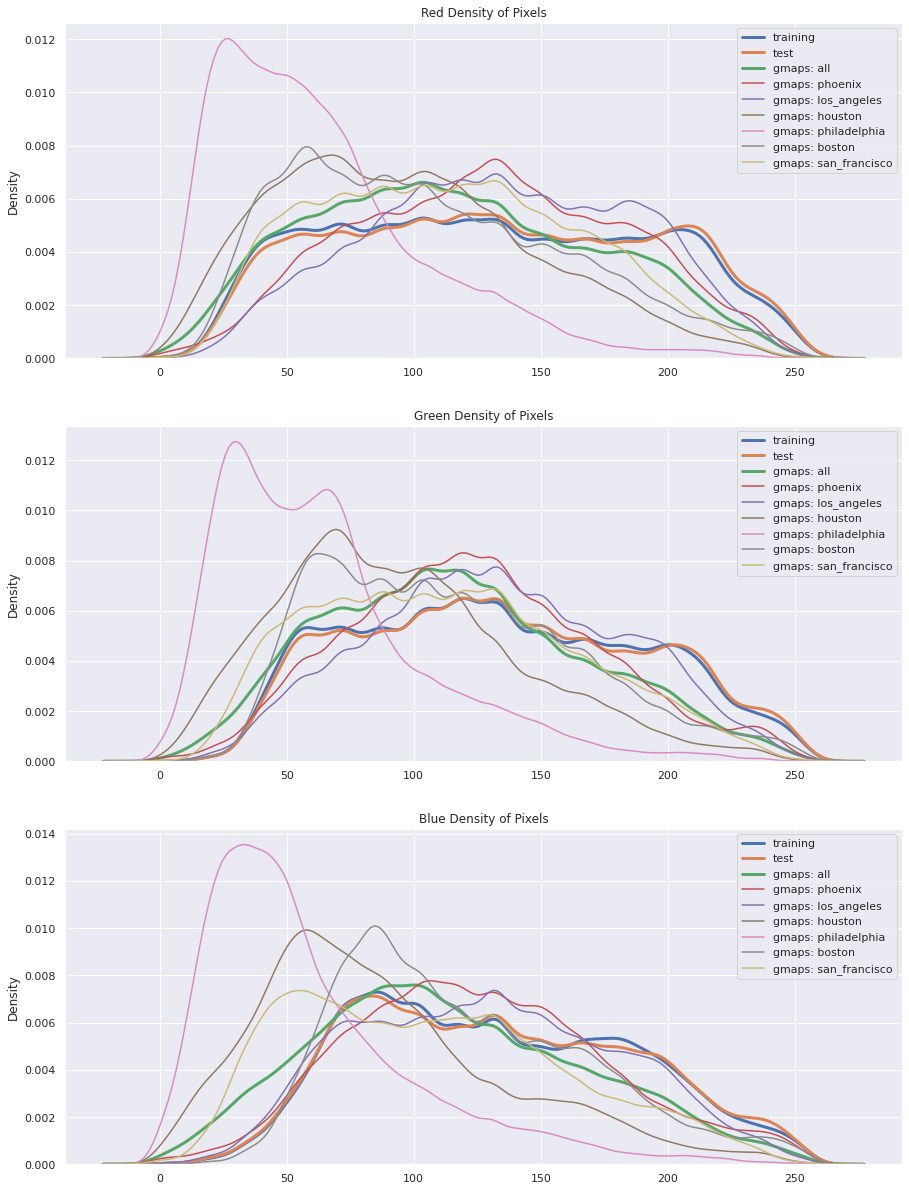

In [23]:
_, ax = plt.subplots(3, 1, figsize=(15, 21))
bw = 0.1

ax[0].set_title("Red Density of Pixels")
plot_hist_dict(hist_dict_rgb, channel=0, bandwith=bw, ax=ax[0])

ax[1].set_title("Green Density of Pixels")
plot_hist_dict(hist_dict_rgb, channel=1, bandwith=bw, ax=ax[1])

ax[2].set_title("Blue Density of Pixels")
plot_hist_dict(hist_dict_rgb, channel=2, bandwith=bw, ax=ax[2])

In [24]:
hist_dict_rgb_masked = pixelwise_hist(colorspace='RGB', masked=True)

100%|██████████| 12000/12000 [01:44<00:00, 114.87it/s]


<AxesSubplot:title={'center':'Blue Density of Road Pixels'}, ylabel='Density'>

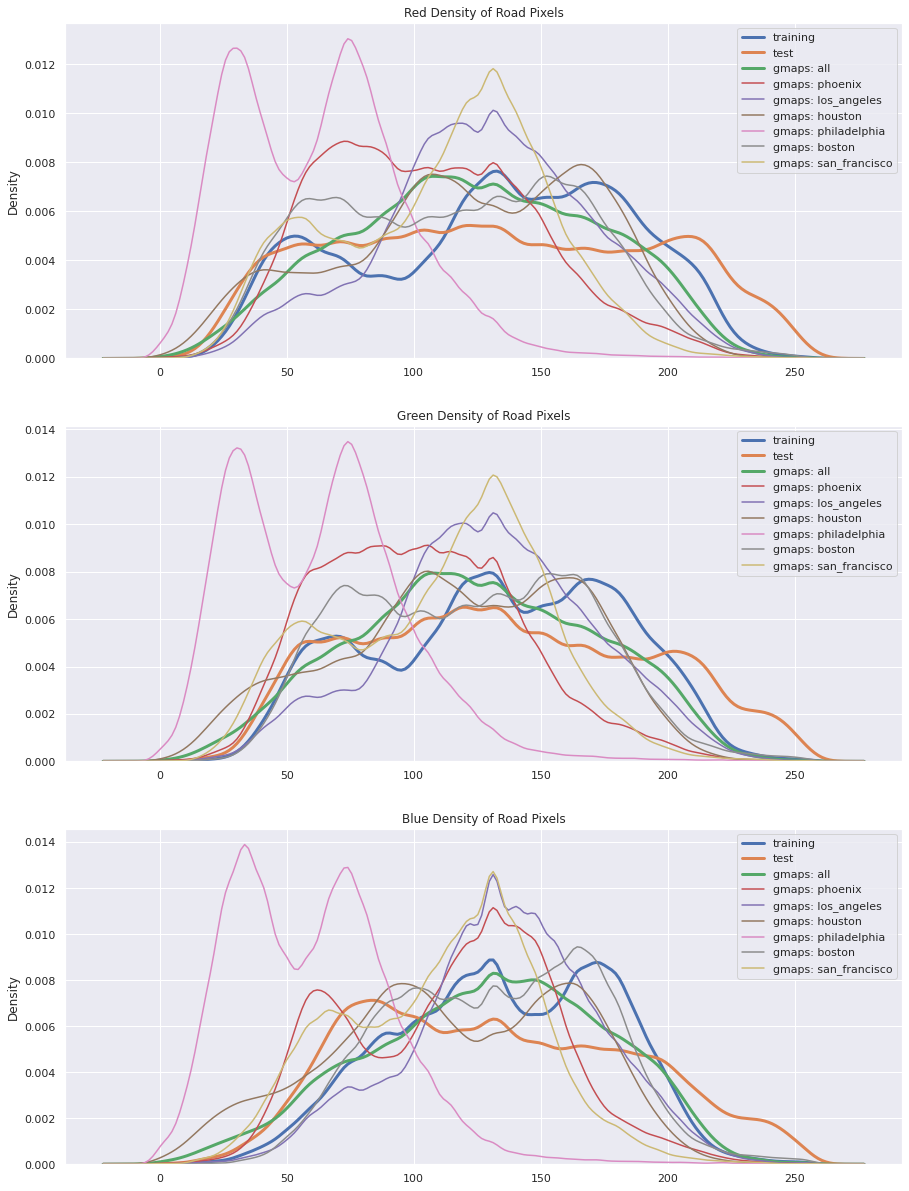

In [27]:
_, ax = plt.subplots(3, 1, figsize=(15, 21))
bw = 0.1

ax[0].set_title("Red Density of Road Pixels")
plot_hist_dict(hist_dict_rgb_masked, channel=0, bandwith=bw, ax=ax[0])

ax[1].set_title("Green Density of Road Pixels")
plot_hist_dict(hist_dict_rgb_masked, channel=1, bandwith=bw, ax=ax[1])

ax[2].set_title("Blue Density of Road Pixels")
plot_hist_dict(hist_dict_rgb_masked, channel=2, bandwith=bw, ax=ax[2])

### Normalizing values